# Taller5  


**0.** Guardando datos en archivos (clase pasada)

In [5]:
"""
Escritura de arreglos tipo numpy en un archivos. 
"""

import numpy as np 
from  matplotlib import pyplot as plt


# -------------guardando dos columna-----------------
n = 10
x = np.linspace(1, 10 , n)
y = np.linspace(2, 20 , n)


# hacer dos columnas, crear un arreglo
datosDosColumnas = np.column_stack(  (x, y)  )

 
# guardado de numpy!!!!
np.savetxt('archivo.dat', datosDosColumnas, header = "X-Columna, Y-Columna")

[[ 1.  2.]
 [ 2.  4.]
 [ 3.  6.]
 [ 4.  8.]
 [ 5. 10.]
 [ 6. 12.]
 [ 7. 14.]
 [ 8. 16.]
 [ 9. 18.]
 [10. 20.]]


**1.** Lectura de datos (nuevo)

los datos recuperados son:
 [[ 1.  2.]
 [ 2.  4.]
 [ 3.  6.]
 [ 4.  8.]
 [ 5. 10.]
 [ 6. 12.]
 [ 7. 14.]
 [ 8. 16.]
 [ 9. 18.]
 [10. 20.]]


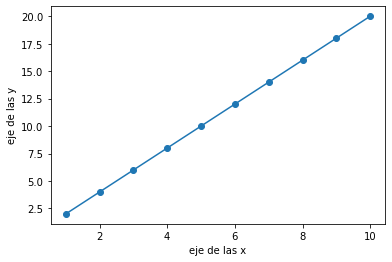

In [7]:
# recuperando datos
datosRecuperados = np.loadtxt('archivo.dat')


#ver los datos recuperados, imprimiendolos en pantalla
print("los datos recuperados son:\n", datosRecuperados)
 

# obtener los datos por separado (Note automaticamente descarta los headers!!!)
x2 = datosRecuperados[:, 0] # toda la primera columna
y2 = datosRecuperados[:, 1] # toda la segunda columna


#graficar los datos recuperados
plt.plot(x2,y2 , marker='o')
plt.xlabel('eje de las x')
plt.ylabel('eje de las y')
plt.show() 

### Ejercicio



**a.** Lea los datos contenidos en el archivo 'archivo1.dat'.

**b.** Grafique los datos establezca  si la relación de proporcionalidad entre los datos es directa o inversa.

**c.** Determine la constante de proporcionalidad.   


**Solución**









**1.**

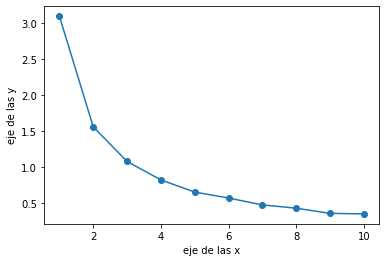

In [71]:
# recuperando datos
datos = np.loadtxt('datos.dat')

# obtener los datos por separado (Note automaticamente descarta los headers!!!)
x = datos[:, 0] # toda la primera columna
y = datos[:, 1] # toda la segunda columna

#graficar los datos recuperados
plt.plot(x,y , marker='o')
plt.xlabel('eje de las x')
plt.ylabel('eje de las y')
plt.show() 

2. La relación de proporcionalidad es inversa! entonces los datos deben estar relacionados como:
   
$$ y = c / x $$
    
   
    

3. Estimando el valor de la constante: para cada valore de x y y tenemos que e debe cumplir:

$$ y x = c  $$

Lo cual nos da un valor de $c$ para cada punto. Entonces, podemos aproximar $c$ como el promedio:


In [72]:
#encontrando la constante de proporcionalidad
C = y * x

print("\n")
print(C)


#tomando el promedio
Constante = np.mean(C)


print("\n")
print("Valor aproximado de la constante = ", Constante)



[3.09088305 3.11725955 3.23402466 3.29147986 3.27079001 3.4301211
 3.33434335 3.44600679 3.23349214 3.51303509]


Valor aproximado de la constante =  3.2961435604158753


**(EN CASO DE SER NECESARIO) GENERAR EL ARCHIVO DE DATOS CON UN LEVE RUIDO**

In [73]:
import random, numpy
n=10

x = np.linspace(1, 10    , n)
y = 3/x +  np.random.random_sample( len(x) )*1e-1

# hacer dos columnas, crear un arreglo
datosDosColumnas = np.column_stack(  (x, y)  )

 
# guardado de numpy!!!!
np.savetxt('datos.dat', datosDosColumnas, header = "X-Columna, Y-Columna")

# Regresion lineal por minimos cuadrados

Suponga que se tienen dos conjuntos de datos $X=[x_i]$ y $Y=[y_i]$. Entonces, se puede realizar una *regresión lineal* para estableceer uan relacion entre los conjuntos de datos tal que
$$Y = \beta_0 +  \beta_1 X + \epsilon,$$
en donde $\beta_0$ (*intercepto*) y $\beta_1$ (*pendiente*) son los parámetros del modelo y $\epsilon$ representa el término de error.  La estimación de los parámetros $B$ y $M$ se realiza a través del *método de mínimos cuadrados*.



**Método de mínimos cuadrados**

La idea del método es minimizar la suma de las diferencias cuadráticas (el error) entre los valores generados ($Y_i$) por la función modelo y los correspondientes valores de los datos reales ($y_i$). Es decir, encontrar los valores de $\beta_0$ y $\beta_1$ tales que la función  
$$E(\beta_0, \beta_1) = \sum_{i=1}^n\left[ y_i - Y_i \right]^2 = \sum_{i=1}^n\left[ y_i - (\beta_0 + \beta_1\,x_i)\right]^2$$ 
 tenga que mínimo valor posible.




- Evaluación de los  parámetros a partir de los datos: al realizar el proceso de minimización de la función $E(\beta_0, \beta_1)$ se obtiene



$$\beta_0  = \frac{\left( \sum_{i=1}^{n} x_i^2\right) \left( \sum_{i=1}^{n} y_i\right) - \left( \sum_{i=1}^{n} x_iy_i\right)\left( \sum_{i=1}^{n} x_i\right) }{n\left(\sum_{i=1}^{n} x_i^2\right)- \left( \sum_{i=1}^{n} x_i\right)^2}   $$


$$\beta_1 = \frac{n\left( \sum_{i=1}^{n} x_i y_i\right) - \left( \sum_{i=1}^{n} x_i\right)\left( \sum_{i=1}^{n} y_i\right) }{n\left(\sum_{i=1}^{n} x_i^2\right)- \left( \sum_{i=1}^{n} x_i\right)^2} \color{white}{........} $$



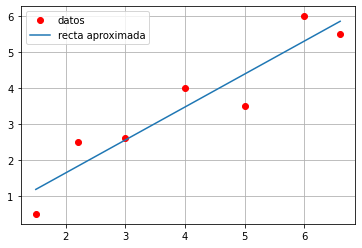

In [70]:
#importamos el modulos de numpy (numeric python)
import numpy as np

#importamos del módulo matplotlib la libreria pyplot con el alias de plt 
import matplotlib.pyplot as plt


#datos que queremos ajustar
x = [1.5  ,2.2  ,3 ,4 ,5  ,6,6.6]
y = [0.5,2.5,2.6 ,4 ,3.5,6,5.5]


#---------------------------------------------------------
#Calculo de la pendiente (m) y el intercepto (b) de la linealizacion
n = len(x)

#donde almacenaremos los valores de las sumas
suma_xi  = 0
suma_yi  = 0
suma_xixi= 0
suma_xiyi= 0

for i in range( n ):        
    suma_xi   += x[i]
    suma_yi   += y[i]
    suma_xixi += x[i]**2
    suma_xiyi += x[i]*y[i]

#aplicado las formulas

beta1 = (n  * suma_xiyi      - suma_xi   * suma_yi) / (n * suma_xixi - suma_xi**2)

beta0 = (suma_xixi * suma_yi - suma_xiyi * suma_xi) / (n * suma_xixi - suma_xi**2)


#Linea recta aproximada
L = beta1 * np.array(x) + beta0  #note que aqui toca transformar la lista de x a un arreglo!

#---------------------------------------------------------
 

 
#--------------graficando---------------------------
#Graficando las parejas de datos
plt.plot(  x  , y , "or" , label="datos" )


#Graficando la recta segun m y b 
plt.plot(  x , L , label="recta aproximada"  )


#mostrando las legendas del grafico
plt.grid()       
plt.legend()
    
#Mostrando el gráfico
plt.show()    
     

# Regresion linal usando el modulo scipy

In [49]:
! pip show scipy

Name: scipy
Version: 1.6.2
Summary: SciPy: Scientific Library for Python
Home-page: https://www.scipy.org
Author: None
Author-email: None
License: BSD
Location: /home/leon/anaconda3/lib/python3.8/site-packages
Requires: numpy
Required-by: jitcode, statsmodels, seaborn, scikit-learn, scikit-image


In [51]:
from scipy import stats   # Carga el módulo de herramientas estadísticas 

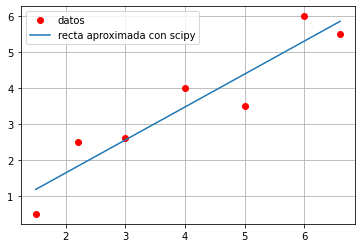

In [68]:
#datos que queremos ajustar
x = [1.5  ,2.2  ,3 ,4 ,5  ,6,6.6]
y = [0.5,2.5,2.6 ,4 ,3.5,6,5.5]


#Haciendo la regresion lineal con scipy
regresion_lineal = stats.linregress(x,y)

# Resultados del análisis
beta0 = regresion_lineal.intercept   # Intercepto
beta1 = regresion_lineal.slope       # Pendiente 


L2 =   beta1* np.array(x) + beta0


#--------------graficando---------------------------
#Graficando las parejas de datos
plt.plot(  x  , y , "or" , label="datos" )


#Graficando la recta segun m y b 
plt.plot(  x , L2 , label="recta aproximada con scipy"  )


#mostrando las legendas del grafico
plt.grid()       
plt.legend()
    
#Mostrando el gráfico
plt.show()    
